In [156]:
from skimage.io import imread
image = imread('parrots.jpg')

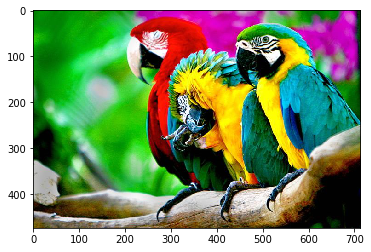

In [157]:
import pylab
%matplotlib inline
pylab.imshow(image)

In [158]:
from skimage import img_as_float
img = img_as_float(image)

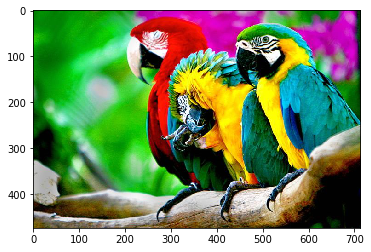

In [159]:
pylab.imshow(img)

In [160]:
import numpy as np

x, y, z = img.shape
objects_features_matrix = np.reshape(img, (x * y, z))

In [161]:
objects_features_matrix

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

In [282]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', random_state=241).fit(objects_features_matrix)

In [309]:
#метод возвращает кластеризированны изображения по медиане и среднему
def mean_median_images(kmeans, img):
    x, y, z = img.shape
    objects_features_matrix = np.reshape(img, (x * y, z))
    intensity = np.zeros((len(objects_features_matrix), 4))
    intensity[:,:3] = objects_features_matrix
    intensity[:,3] = kmeans.labels_
    array_of_clusterizing_points = []
    arra_of_indexes = []
    medians = []
    means = []
    for color in set(kmeans.labels_):
        arr, arr_ind = intensity[intensity[:,3] == color], np.where(intensity[:,3] == color)
        arra_of_indexes.append(arr_ind)
        array_of_clusterizing_points.append(arr)
        median_values = [np.median(arr[:,0]), np.median(arr[:,1]), np.median(arr[:,2])]
        medians.append(median_values)
        mean_values = [np.mean(arr[:,0]), np.mean(arr[:,1]), np.mean(arr[:,2])]
        means.append(mean_values)
    objects_features_copy = np.copy(objects_features_matrix)
    for i in set(kmeans.labels_):
        objects_features_copy[list(arra_of_indexes[i])] = means[i]
    img_mean = np.reshape(objects_features_copy, (x, y, z))
    objects_features_copy = np.copy(objects_features_matrix)
    for i in set(kmeans.labels_):
        objects_features_copy[list(arra_of_indexes[i])] = medians[i]
    img_median = np.reshape(objects_features_copy, (x, y, z))
    return img_mean, img_median

In [311]:
img_mean, img_median = mean_median_images(kmeans, img)

C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [313]:
def mse_for_image(img1, img2):
    err = (img1-img2)**2
    return sum(sum(sum(err)))/(img1.shape[0]*img1.shape[1]*3)

In [317]:
def PSNR(img, img_mean, img_median):
    a = mse_for_image(img, img_mean)
    b = mse_for_image(img, img_median)
    return 20*np.log10(1) - 10*np.log10(a), 20*np.log10(1) - 10*np.log10(b) 

In [318]:
PSNR(img, img_mean, img_median)

(18.436829014063576, 18.137971443396104)

In [321]:
for i in range(8, 21):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=241).fit(objects_features_matrix)
    mean, median = mean_median_images(kmeans, img)
    psnr = max(PSNR(img, mean, median))
    print(i, psnr)
    if psnr >= 20:
        print(i)
        break

C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


8 18.436829014063576


C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


9 19.112672735788138


C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


10 19.64075663591531
11 20.127588746514583
11


C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\snekl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [299]:
from skimage.io import imsave
imsave('median.jpg', img_median)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
